# Online Retail Recommendation System


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split


## Introduction
In today's digital age, e-commerce platforms use recommendation systems to enhance customer experience 
by suggesting relevant products. Recommendation systems increase sales, improve customer satisfaction, 
and help in cross-selling. 

This project focuses on building a recommendation system using the **Online Retail dataset**. 
The goal is to suggest products to customers based on past purchase data and overall popularity.


In [7]:
import pandas as pd

data = pd.read_excel(r"C:\Users\HP\OneDrive\Documents\SANKET_PROJECT\online retail recommendation system\OnlineRetail.xlsx")
print(data.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [8]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
data.to_csv(r"C:\Users\HP\Downloads\OnlineRetail.xlsx", index=False) 
print("it is done +")

it is done +


In [11]:
data = data.drop_duplicates()

In [22]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Year,Month,Day,TotalPrice
count,392732.000000,392732,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000
mean,13.153718,2011-07-10 19:15:24.576301568,3.125596,15287.734822,2010.934630,7.601935,15.044651,22.629195
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,2010.000000,1.000000,1.000000,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,2011.000000,5.000000,7.000000,4.950000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,2011.000000,8.000000,15.000000,12.390000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,2011.000000,11.000000,22.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,2011.000000,12.000000,31.000000,168469.600000
std,181.588420,NaN,22.240725,1713.567773,0.247178,3.415023,8.652557,311.083465


In [12]:
data = data.dropna(subset=['CustomerID'])
data = data[data['Quantity'] > 0]
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


In [13]:
data = data[data['Quantity'] > 0]


In [14]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day


In [15]:
data['CustomerID'] = data['CustomerID'].astype(int)


In [16]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']


In [ ]:
## Dataset Description
The dataset is taken from Kaggle and contains online retail transactions. 

**Columns in the dataset:**
- **InvoiceNo**: Unique identifier for each transaction  
- **StockCode**: Product ID  
- **Description**: Name/description of the product  
- **Quantity**: Number of units bought  
- **InvoiceDate**: Date and time of the transaction  
- **UnitPrice**: Price of a single unit of the product  
- **CustomerID**: Unique ID for the customer  
- **Country**: Country where the transaction occurred  

The dataset contains thousands of rows, covering transactions from multiple countries.


In [17]:
print(data.info()) # rows and columns
print(data.describe())
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  int64         
 7   Country      392732 non-null  object        
 8   Year         392732 non-null  int32         
 9   Month        392732 non-null  int32         
 10  Day          392732 non-null  int32         
 11  TotalPrice   392732 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2), object(4)
memory usage: 34.5+ MB
None
            Quantity                    InvoiceDate      UnitPrice  \
count  392732.000000       

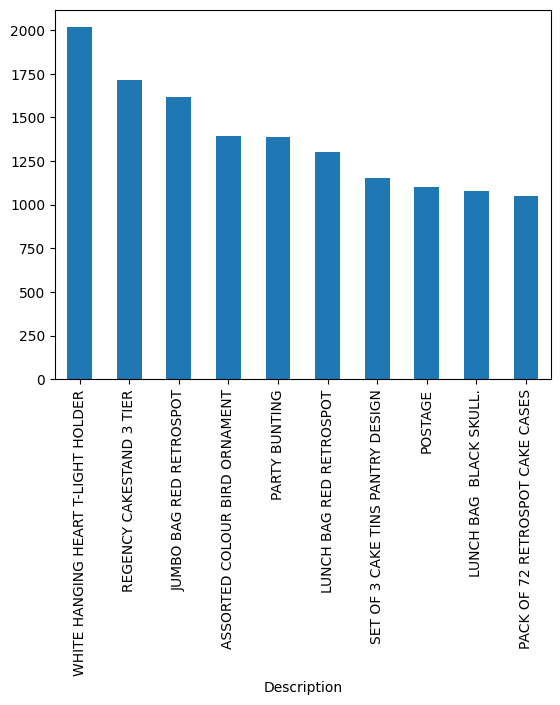

In [18]:
top_products = data['Description'].value_counts().head(10)
top_products.plot(kind='bar')
plt.show()

In [19]:
popularity = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print(popularity.head(10))


Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


In [24]:
top_customers = data.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['Description'].astype(str))


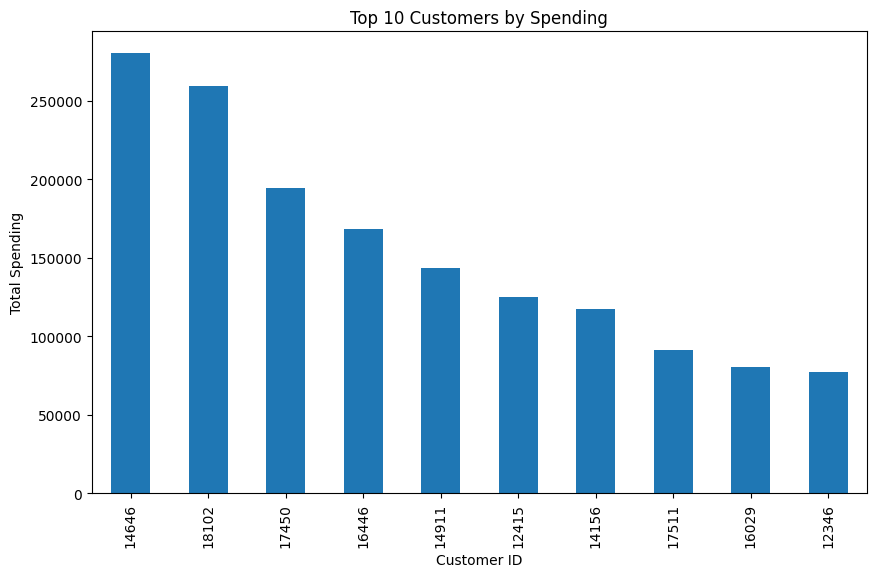

In [25]:
plt.figure(figsize=(10,6))
top_customers.head(10).plot(kind='bar')
plt.title("Top 10 Customers by Spending")
plt.xlabel("Customer ID")
plt.ylabel("Total Spending")
plt.show()


In [21]:
popular_items = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print(popular_items.head(10))


Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


EXPLORATARY## Exploratory Data Analysis (EDA)

We performed EDA to understand the dataset better and prepare it for building a recommendation system.

**Key steps:**
1. Checked for missing values (CustomerID had many nulls).  
2. Removed duplicate rows.  
3. Filtered out negative quantities (returns) and zero-priced products.  
4. Explored top-selling products by total quantity.  
5. Analyzed the top customers by spending.  
6. Visualized sales by country.  

**Insights:**
- The dataset contained some invalid entries (negative values, missing IDs).  
- The UK had the maximum number of transactions.  
- A few products dominate sales, making them ideal candidates for popularity-based recommendations.  
 DATA ANALYSIS*
  

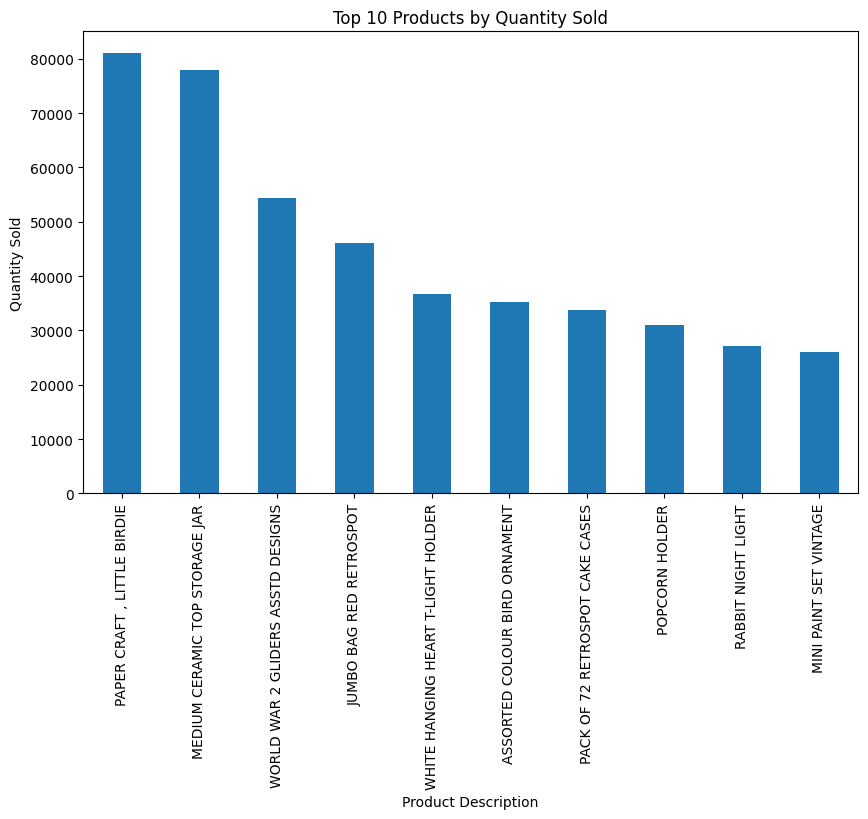

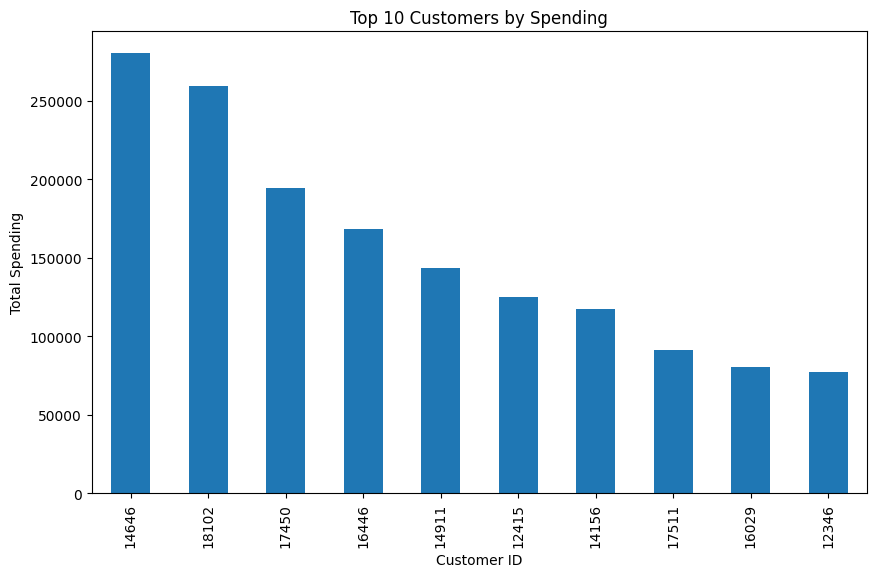

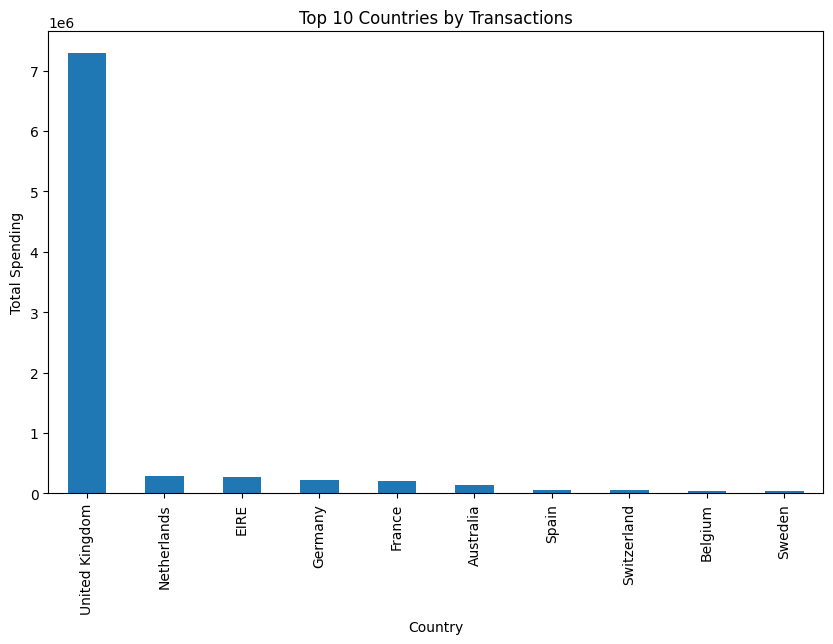

In [28]:
# Create TotalPrice column
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 products
popularity = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
popularity.head(10).plot(kind='bar')
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Product Description")
plt.ylabel("Quantity Sold")
plt.show()

# Top 10 customers
top_customers = data.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
top_customers.head(10).plot(kind='bar')
plt.title("Top 10 Customers by Spending")
plt.xlabel("Customer ID")
plt.ylabel("Total Spending")
plt.show()

# Sales by country
country_sales = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
country_sales.head(10).plot(kind='bar')
plt.title("Top 10 Countries by Transactions")
plt.xlabel("Country")
plt.ylabel("Total Spending")
plt.show()


## Methodology

We built two types of recommendation systems:

1. **Popularity-Based Recommendation**
   - Recommends the most purchased products across all customers.
   - Simple and effective for new users (cold start problem).

2. **Collaborative Filtering (Item-Item Similarity)**
   - Builds a user-item matrix.
   - Uses cosine similarity to recommend items similar to what a customer has already purchased.
